In [1]:
import osmnx as ox
import networkx as nx

In [2]:
ox.config(use_cache=True, log_console=True)

In [6]:
graph = ox.graph_from_bbox(48.1510, 48.1249, 11.5430, 11.6104, network_type='walk', simplify=True, retain_all=False)

In [7]:
graph_projected = ox.project_graph(graph)

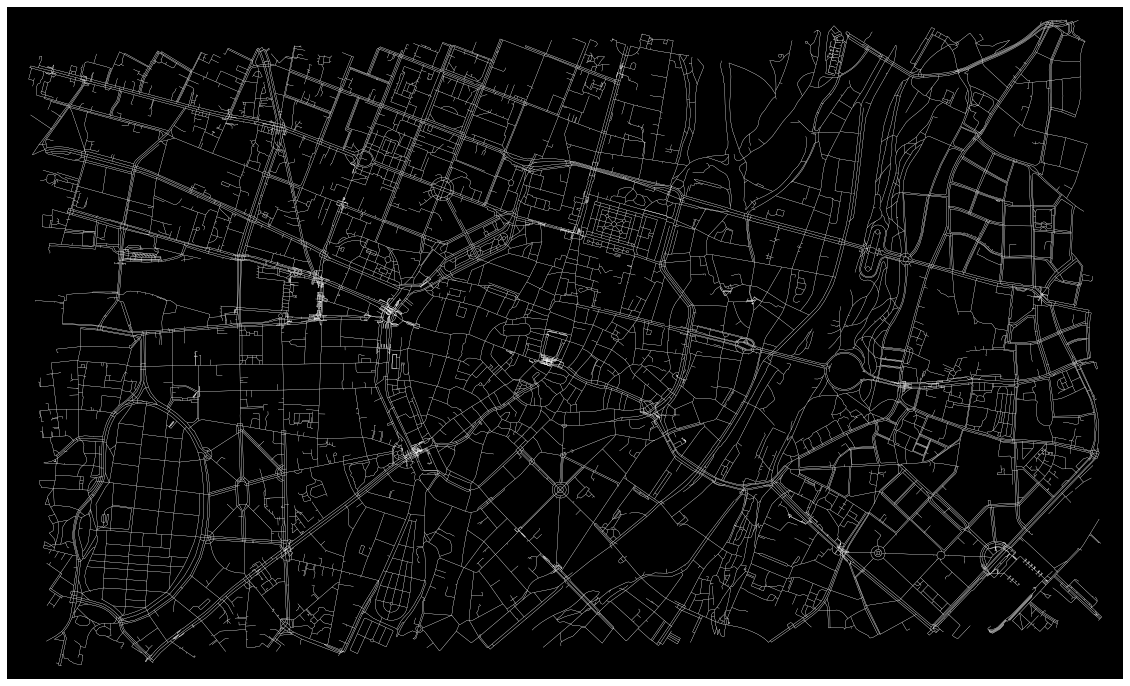

In [8]:
fig, ax = ox.plot_graph(graph_projected, node_size=0, edge_color='w', edge_linewidth=0.2, bgcolor='k', figsize=(20, 20), dpi=10000)

In [9]:
basic_stats = ox.basic_stats(graph_projected)

In [10]:
basic_stats

{'n': 11504,
 'm': 32776,
 'k_avg': 5.698191933240612,
 'edge_length_total': 1090231.3699999838,
 'edge_length_avg': 33.26310013424408,
 'streets_per_node_avg': 2.8786509040333796,
 'streets_per_node_counts': {0: 0,
  1: 2257,
  2: 2,
  3: 6291,
  4: 2815,
  5: 121,
  6: 12,
  7: 3,
  8: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.19619262865090403,
  2: 0.00017385257301808066,
  3: 0.5468532684283728,
  4: 0.24469749652294853,
  5: 0.01051808066759388,
  6: 0.001043115438108484,
  7: 0.000260778859527121,
  8: 0.000260778859527121},
 'intersection_count': 9247,
 'street_length_total': 545115.6849999999,
 'street_segment_count': 16388,
 'street_length_avg': 33.26310013424457,
 'circuity_avg': 1.0387513110418476,
 'self_loop_proportion': 0.002074688796680498}

In [12]:
# Gets the all the nodes and edges from a graph
nodes, edges = ox.graph_to_gdfs(graph_projected, nodes=True, edges=True)

In [22]:
# Start y, x
start = (48.137551, 11.549800)

# Goal
target = (48.136073, 11.610399)

In [23]:
start

(48.137551, 11.5498)

In [24]:
nodes.head(1)

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
277381,5.334733e+06,689690.637375,4,11.5498,48.137551,NaN,NaN,POINT (689690.637 5334733.086)


In [25]:
#Network analysis
#Find the closest node from the network (given any point in the graph)
start = ox.distance.nearest_nodes(graph_projected, start[1], start[0])

In [19]:
# Getting the route nodes information.  route_nodes = nodes.loc[route]

In [27]:
#Gets the connected neighbors
for neighbor in nx.neighbors(graph_projected,start):
    print(neighbor)

2456450696
1099934871
775283935
295209


In [13]:
#Gets the path between two nodes length
path = [2456450696, 277381]
distance = nx.path_weight(graph_projected, path, "length")

16.079

In [68]:
# Testing out Algorithm

# Infinity should be at least as big as the edges cumulative distance 
# Thus, greater than "street_length_total: 545115"
infinity = 999999

#Makes copy of nodes dataframe that could be deleted (for convinience)
unseenNodes = nodes.copy()

#Records the shortest distance to give each node, it will be updated as we go
queue = {} 


# All nodes should be set to infinity. Start node to 0.
for row in nodes.itertuples(index=True):
    shortest_distance[row[0]] = infinity 
shortest_distance[start] = 0

In [85]:
#Gets the connected neighbors

current_node = start

queue = []

# while unseenNodes:
#     for neighbor in nx.neighbors(graph_projected,current_node):
#         print(neighbor)
    

#Gets the path between two nodes length
path = [2456450696, 277381]
distance = nx.path_weight(graph_projected, path, "length")

In [82]:
unseenNodes = unseenNodes.drop(2456450696)